In [209]:
import urllib.request
import json

count = 100
owner_id = -25232578
token = 'c2bff29ec2bff29ec2bff29e68c2d6303acc2bfc2bff2\
9e9e17800d29762b8017da70c3'
posts_num = []
texts = []
dates = []

for i in range(0, 300, 100):
    request = 'https://api.vk.com/method/wall.get?owner_\
    id=%d&offset=%d&count=%d&v=5.92&access_token=%s' % (owner_id, i, count, token)
    req = urllib.request.Request(request)
    response = urllib.request.urlopen(req).read().decode('utf-8')
    data = json.loads(response)
    for j in range(len(data['response']['items'])):
        posts_num.append(data['response']['items'][j]['id'])  # id постов
        texts.append(data['response']['items'][j]['text'])  # тексты постов
        dates.append(data['response']['items'][j]['date'])  # дата публикации
        
print(posts_num[:50])

[6698617, 6698514, 6698380, 6698257, 6698122, 6698028, 6697888, 6697748, 6697672, 6697575, 6697460, 6697264, 6697011, 6696712, 6696667, 6696573, 6696546, 6696467, 6696056, 6695748, 6695592, 6695409, 6695079, 6694661, 6694537, 6693926, 6693841, 6693676, 6693565, 6693538, 6693337, 6693280, 6693210, 6693114, 6692993, 6692911, 6692844, 6692791, 6692724, 6692666, 6692618, 6692578, 6692509, 6692443, 6692397, 6692337, 6692266, 6692220, 6692176, 6692099]


In [210]:
posts = {}

for i in range(len(posts_num)):
    posts[posts_num[i]] = [texts[i], dates[i]]

In [212]:
comments = {}

for post in posts_num:
    text_comment = []
    ids = []
    for i in range(0, 200, 100):
        request = 'https://api.vk.com/method/wall.getComments?\
        owner_id=%d&post_id=%d&offset=%d&count=%d&v=5.92\
        &access_token=%s' % (owner_id, post, i, count, token)
        req = urllib.request.Request(request)
        response = urllib.request.urlopen(req).read().decode('utf-8')
        data = json.loads(response)
        for j in range(len(data['response']['items'])):
            try:
                text_comment.append(data['response']['items'][j]['text'])
                ids.append(data['response']['items'][j]['from_id'])  
                # профили комментаторов
            except KeyError:
                continue
    comments[post] = [text_comment, ids]

In [243]:
# Подсчет слов в постах и комментариях

sym = ".,?!…:;()[]-—–_|/\"'«»*{}<>@#$%^&№0123456789"

for key, value in posts.items():
    all_words_post = []
    all_lens_comment = []
    words = value[0].lower().strip().split()
    for word in words:
        new_word = word.strip(sym)
        if len(new_word) > 0:
            all_words_post.append(new_word)
    if len(value) < 3:
        value.append(len(all_words_post))
    else:
        value.pop(-1)
        value.append(len(all_words_post))
    com_len = 0
    for com in comments[key][0]:
        all_words_comment = []
        words = com.lower().strip().split()
        for word in words:
            new_word = word.strip(sym)
            if len(new_word) > 0:
                all_words_comment.append(new_word)
        all_lens_comment.append(len(all_words_comment))
        com_len += len(all_words_comment)
    if len(comments[key][0]) != 0:
        result = com_len//len(comments[key][0])
        if len(comments[key]) < 3:
            comments[key].append(result)
            comments[key].append(all_lens_comment)
        else:
            comments[key].pop(-1)
            comments[key].append(result)
            comments[key].append(all_lens_comment)
    else:
        comments[key].append(0)
        comments[key].append([])

In [220]:
x = []
y = []

for key, value in posts.items():
    x.append(value[2])
    y.append(comments[key][2])

In [221]:
new = {}

for i in range(len(x)):
    if x[i] not in new:
        new[x[i]] = list(str(y[i]))
    else:
        new[x[i]].append(str(y[i]))

In [222]:
for key, value in new.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new[key] = res

In [223]:
import matplotlib.pyplot as plt
import seaborn

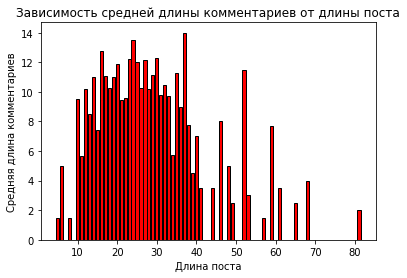

In [224]:
title = 'Зависимость средней длины комментариев от длины поста'
plt.bar(new.keys(), new.values(), color='red', edgecolor='k')
plt.title(title)
plt.xlabel('Длина поста')
plt.ylabel('Средняя длина комментариев')
plt.savefig(title)

plt.show()

In [225]:
import time

for key, value in posts.items():
    value[1] = list(time.localtime(value[1]))

In [227]:
import os

filename = 'All_texts.txt'

try:
    os.remove(filename)
    f = open(filename, 'a+', encoding='utf-8')
except:
    f = open(filename, 'a+', encoding='utf-8')

for key, value in posts.items():
    print('Пост:\n' + value[0] + '\n', file=f)
    print('Комментарии:\n' + '\n'.join(comments[key][0]) + '\n', file=f)

f.close()

os.system('mystem.exe -ld ' + ' All_texts.txt' + ' All_texts_mystem.txt')

0

In [228]:
wd_vs_len = {}
hour_vs_len = {}

for value in posts.values():
    if value[1][6] not in wd_vs_len:
        wd_vs_len[value[1][6]] = []
        wd_vs_len[value[1][6]].append(str(value[-1]))
    else:
        wd_vs_len[value[1][6]].append(str(value[-1]))
    if value[1][3] not in hour_vs_len:
        hour_vs_len[value[1][3]] = []
        hour_vs_len[value[1][3]].append(str(value[-1]))
    else:
        hour_vs_len[value[1][3]].append(str(value[-1]))

In [230]:
x1 = []
y1 = []

x2 = []
y2 = []

for key, value in wd_vs_len.items():
    x1.append(key)
    y1.append(value)

for key, value in hour_vs_len.items():
    x2.append(key)
    y2.append(value)

In [231]:
new1 = {}

for i in range(len(x1)):
    if x1[i] not in new1:
        new1[x1[i]] = y1[i]
    else:
        new1[x1[i]].append(y1[i])
        
for key, value in new1.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new1[key] = res

In [232]:
new2 = {}

for i in range(len(x2)):
    if x2[i] not in new2:
        new2[x2[i]] = y2[i]
    else:
        new2[x2[i]].append(y2[i])
        
for key, value in new2.items():
    sum = 0
    for val in value:
        sum += int(val)
    res = sum/len(value)
    new2[key] = res

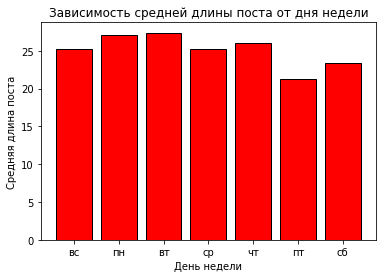

In [297]:
title = 'Зависимость средней длины поста от дня недели'
plt.bar(new1.keys(), new1.values(), color='red', edgecolor='k')
plt.title(title)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
plt.xlabel('День недели')
plt.ylabel('Средняя длина поста')
plt.savefig(title)

plt.show()

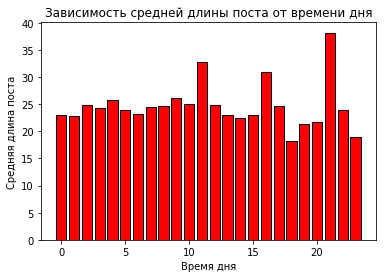

In [298]:
title = 'Зависимость средней длины поста от времени дня'
plt.bar(new2.keys(), new2.values(), color='red', edgecolor='k')
plt.title(title)
plt.xlabel('Время дня')
plt.ylabel('Средняя длина поста')
plt.savefig(title)

plt.show()

In [237]:
c = 0
keys = []

for key,value in comments.items():
    c += len(value[0])
    if c < 150:
        keys.append(key)
    else:
        break

In [246]:
for key in keys:
    value = comments[key]
    try:
        value.pop(4)
        value.append([])
    except:
        value.append([])
    for i in range(len(value[0])):
        if str(value[1][i])[0] != '-':
            request = 'https://api.vk.com/method/users.get?\
            user_ids=%s&fields=sex,city,has_photo&v=5.92&\
            access_token=%s' % (value[1][i], token)
            req = urllib.request.Request(request)
            response = urllib.request.urlopen(req).read().decode('utf-8')
            data = json.loads(response)
            try:
                data['response'][0]['city']['title']
                value[4].append([data['response'][0]['sex'],\
                                 data['response'][0]['city']['title'],
                                 data['response'][0]['has_photo']])
            except:
                value[4].append([data['response'][0]\
                                 ['sex'], 'No city', \
                                 data['response'][0]['has_photo']])
        else:
            value[4].append([])

In [272]:
cities = {}
sexs = {}
has_photos = {}

for key in keys:
    for i in range(len(comments[key][0])):
        if comments[key][-1][i][0] not in sexs:
            sexs[comments[key][-1][i][0]] = [comments[key][-2][i]]
        else:
            sexs[comments[key][-1][i][0]].append(comments[key][-2][i])
        if comments[key][-1][i][1] not in cities:
            cities[comments[key][-1][i][1]] = [comments[key][-2][i]]
        else:
            cities[comments[key][-1][i][1]].append(comments[key][-2][i])
        if comments[key][-1][i][2] not in has_photos:
            has_photos[comments[key][-1][i][2]] = [comments[key][-2][i]]
        else:
            has_photos[comments[key][-1][i][2]].append(comments[key][-2][i])

In [276]:
for key, value in sexs.items():
    sum = 0
    for i in value:
        sum += i
    sexs[key] = sum/len(value)

for key, value in cities.items():
    sum = 0
    for i in value:
        sum += i
    cities[key] = sum/len(value)

for key, value in has_photos.items():
    sum = 0
    for i in value:
        sum += i
    has_photos[key] = sum/len(value)

Три следующих графика могут оказаться не особо репрезентативными, потому что соотношение объектов в классах не равноценно.

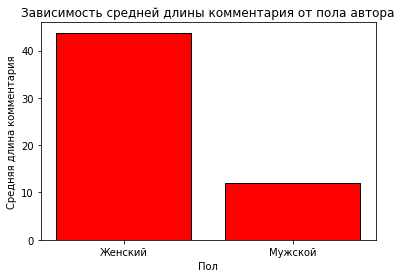

In [299]:
x = []
y = []

for key, value in sexs.items():
    x.append(key)
    y.append(value)

plt.bar(x, y, color='r', edgecolor='k')
plt.title('Зависимость средней длины комментария от пола автора')
plt.ylabel('Средняя длина комментария')
plt.xlabel('Пол')
plt.xticks([1, 2], ['Женский', 'Мужской'])
plt.savefig('Зависимость средней длины комментария от пола автора')

plt.show()

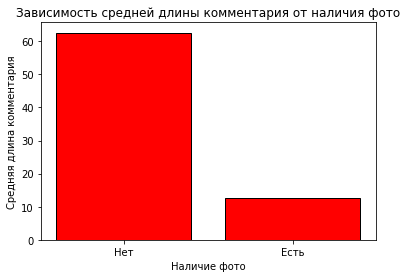

In [300]:
x = []
y = []

for key, value in has_photos.items():
    x.append(key)
    y.append(value)

plt.bar(x, y, color='r', edgecolor='k')
plt.title('Зависимость средней длины комментария от наличия фото')
plt.ylabel('Средняя длина комментария')
plt.xlabel('Наличие фото')
plt.xticks([0, 1], ['Нет', 'Есть'])
plt.savefig('Зависимость средней длины комментария от наличия фото')

plt.show()

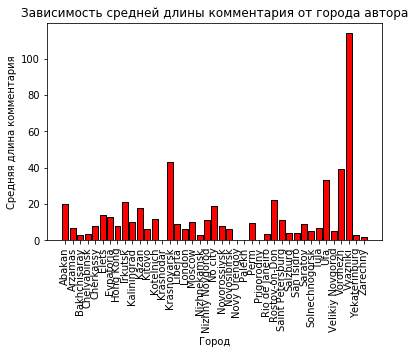

In [305]:
x = []
y = []

for key, value in sorted(cities.items()):
    x.append(key)
    y.append(value)

plt.bar(x, y, color='r', edgecolor='k')
plt.title('Зависимость средней длины комментария от города автора')
plt.ylabel('Средняя длина комментария')
plt.xlabel('Город')
plt.xticks(rotation=90)
plt.savefig('Зависимость средней длины комментария от\
города автора', bbox_inches='tight')

plt.show()

In [173]:
stops = []

with open('rus_stopwords.txt', 'r', encoding='utf-8') as stop:
    for line in stop:
        stops.append(line.strip())

In [174]:
clean_text = []

sym = ".,?!…:;()[]-—– _|/\"'«»*{}<>@#$%^&№0123456789"

with open('All_texts.txt', 'r', encoding='utf-8') as f:
    text = f.readlines()
    for line in text:
        new_line = line.lower().strip(sym).split()
        for word in new_line:
            new_word = word.strip(sym)
            if len(new_word) > 0:
                clean_text.append(new_word)

In [175]:
clean = [word for word in clean_text if word not in stops]

In [177]:
clean_text_mystem = []

with open('All_texts_mystem.txt', 'r', encoding='utf-8') as t:
    text = t.read()
    text = text.lower().strip('{}').split('}{')
    for word in text:
        new_word = word.strip('?')
        clean_text_mystem.append(new_word)

In [178]:
clean_mystem = [word for word in clean_text_mystem if word not in stops]

In [179]:
freq = {}

for word in clean:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

In [180]:
for word in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(word, "\t", freq[word])

россии 	 478
лет 	 242
путин 	 228
просто 	 192
украины 	 173
украине 	 173
порошенко 	 171
тоже 	 170
рф 	 166
больше 	 163
сейчас 	 159
власти 	 157
лучше 	 152
вообще 	 152
люди 	 151
сша 	 149
деньги 	 147
россия 	 147
пусть 	 146
людей 	 146
народ 	 142
зеленский 	 141
страны 	 137
давно 	 129
выборы 	 125
человек 	 123
президент 	 123
стране 	 120
путина 	 115
украина 	 114


In [181]:
freq2 = {}

for lemma in clean_mystem:
    if lemma in freq2:
        freq2[lemma] += 1
    else:
        freq2[lemma] = 1

In [182]:
for lemma in sorted(freq2, key=freq2.get, reverse=True)[:50]:
    print(lemma, "\t", freq2[lemma]) 

россия 	 747
украина 	 589
человек 	 564
год 	 488
страна 	 468
🤣 	 463
путин 	 436
😂 	 418
какой 	 353
народ 	 336
президент 	 322
зеленский 	 306
власть 	 264
деньги 	 262
выборы 	 246
новый 	 243
российский 	 230
просто 	 223
хорошо 	 220
давать 	 217
много 	 210
другой 	 205
самый 	 205
становиться 	 204
сделать 	 198
понимать 	 186
мир 	 185
дело 	 185
порошенко 	 184
пенсия 	 181
жить 	 181
рф 	 178
тоже 	 175
хороший 	 173
нефть 	 172
время 	 168
жизнь 	 167
сейчас 	 166
получать 	 161
знать 	 159
https 	 159
пусть 	 158
русский 	 156
вообще 	 154
сша 	 153
👍 	 152
паспорт 	 152
вопрос 	 149
должный 	 145
начинать 	 143


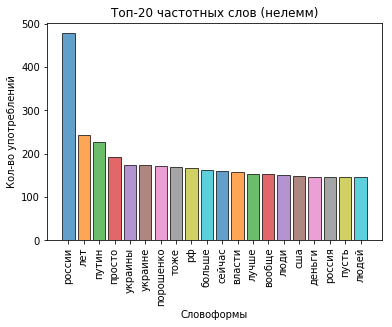

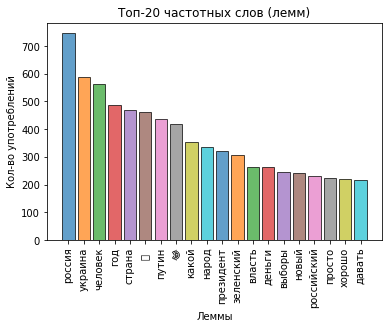

In [184]:
import matplotlib.pyplot as plt

words_plot = []
x = 1
for word in sorted(freq, key=freq.get, reverse=True)[:20]:
    words_plot.append(word)
    plt.bar(x, freq[word], alpha=0.7, edgecolor='k')
    x += 1
plt.xticks([i+1 for i in range(20)], words_plot, rotation=90)
plt.title("Топ-20 частотных слов (нелемм)")
plt.ylabel('Кол-во употреблений')
plt.xlabel('Словоформы')
plt.savefig("Топ-20 частотных слов (нелемм)")
plt.show()

lemmas_plot = []
x = 1
for lemma in sorted(freq2, key=freq2.get, reverse=True)[:20]:
    lemmas_plot.append(lemma)
    plt.bar(x, freq2[lemma], alpha=0.7, edgecolor='k')
    x += 1
plt.xticks([i+1 for i in range(20)], lemmas_plot, rotation=90)
plt.title("Топ-20 частотных слов (лемм)")
plt.ylabel('Кол-во употреблений')
plt.xlabel('Леммы')
plt.savefig("Топ-20 частотных слов (лемм)")
plt.show()

Кол-во употреблений "России" возросло, так как слово, видимо, употребляется в различных падежах в текстах.
"Украина" и "человек" обогнали "года", видимо, по той же причине, но и лемма "год" в два раза чаще встречается, чем словоформа "лет" (ведь есть разные вариации выражения).

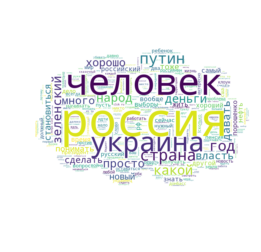

In [186]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(clean_mystem)

comment_mask = np.array(Image.open("image_cloud.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)


cloud.generate(text)


plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


cloud.to_file("post_cloud.png")

In [306]:
comments

{6698617: [['?',
   '',
   'Новость бомба',
   'Если в Путинской Роиссии что-то рвануло- это газ взорвался или учения с сахаром 😁',
   'Вот так вот\nЛюди гибнут за метал',
   'Может все-таки Аврора стреляла?',
   'Рядом школа моего ребенка... Ну и ладно, сегодня выходной, и она ее закончила в прошлом году',
   'П*здец, столько ублюдков с язвительными комментарии. Лишь бы поглумиться, черти ё*аные🤦\u200d♂️',
   'Люди, вы вообще адекватные такие комментарии писать? Шутники нашлись..',
   'ЭТО РУХНУЛ КУРС АКЦИЙ РОССИЙСКИХ КОМПАНИЙ НА НЬЮ ЙОРСКОЙ ФОНДОВОЙ БИРЖЕ',
   'Хорошо, хоть не теракт',
   'Не все изогнутые предметы одинаково полезны!',
   'Что то слабенький какой то боеприпас. На фейк смаживает)',
   'Щас местные мистификатора приплетут теракт, 400 погибших и виновника Путина.',
   'лишь бы люди не погибли',
   'ЦЕРКОВЬ В СГОВОРЕ С РЭКИТИРАМИ ВОРАМИ КОТОРЫЕ РОССИЯН ПОСТАВИЛИ НА БАБКИ. ПРАВИЛЬНО РОССИЯНЕ ДЕЛАЮТ ЧТО НЕ ПЛОТЯТ НАЛОГИ И ПОБОРЫ. КАК НИЗКО ПАЛА ЦЕКОВЬ КОТОРАЯ ПРИМКНУЛА К С

In [330]:
import sqlite3

con = sqlite3.connect("info.db", check_same_thread=False)

cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS new (post_id, type, text, "
            "year_post, month_post, day_post, hour_post, minute_post,"
            " id, sex, has_photo, city);")

for key, value in posts.items():
    cur.execute(
    "INSERT INTO new (post_id, type, text, "
            "year_post, month_post, day_post, \
            hour_post, minute_post,"
            " id, sex, has_photo, city) "
    "VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", (key,\
                    'post', value[0], value[1][0], value[1][1],\
                    value[1][2], value[1][3], value[1][4], \
                    '-', '-', '-', '-'))
    for i in range(len(comments[key][0])):
        cur.execute(
        "INSERT INTO new (post_id, type, text, "
                "year_post, month_post, day_post, \
                hour_post, minute_post,"
                " id, sex, has_photo, city) "
        "VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", (key,\
                    'comment', comments[key][0][i], '-',\
                    '-', '-', '-', '-', comments[key][1][i], \
                    str(comments[key][-1][i]), str(comments\
                    [key][-1][i]), str(comments[key][-1][i])))
    con.commit()

con.close()